# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#**Importing all the Important libraries**

In [ ]:
#import the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')



We imported all the important libraries for the purpose of using functionality.

#**For reading dataset into pandas dataframe**

In [ ]:
# Mount your drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#file path
file_path=("/content/drive/MyDrive/SeoulBikeData.csv")

In [ ]:
#Read the data set of "Bike Sharing Demand Prediction" from variable name data
data=pd.read_csv(file_path,encoding="latin")

#**Exploratory data analysis**

In [ ]:
#Print head of dataframe
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#print tail of dataframe
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#Print shape of dataframe
data.shape

(8760, 14)

In [ ]:
#To show all the columns of the dataset
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#To show the information of all the important aspects of dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#To show unique values
data.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
#Describe summary of the dataset  
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
#checking null values in the dataset
data.isnull().sum()
data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Checking Duplicate Values
value=len(data[data.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [ ]:
#Rename the columns name
data=data.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})
data.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Changing the "Date" column into three "year","month","day" column
data['Date'] = data['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [ ]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day_name()

In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
data['weekdays_weekend']=data['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
data=data.drop(columns=['Date','day','year'],axis=1)

In [ ]:
#Print head after creating a new column
data.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
#Print tail after creating a new column
data.tail()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8759,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0


In [ ]:
data['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

In [ ]:
# change data type int to category
cols = ['Hour','month','weekdays_weekend']

for col in cols:
    data[col] = data[col].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [ ]:
#Print columns after rename the columns name
data.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

#**Analysis of data by visualization**

[Text(0.5, 1.0, 'Count of Rented bikes acording to month')]

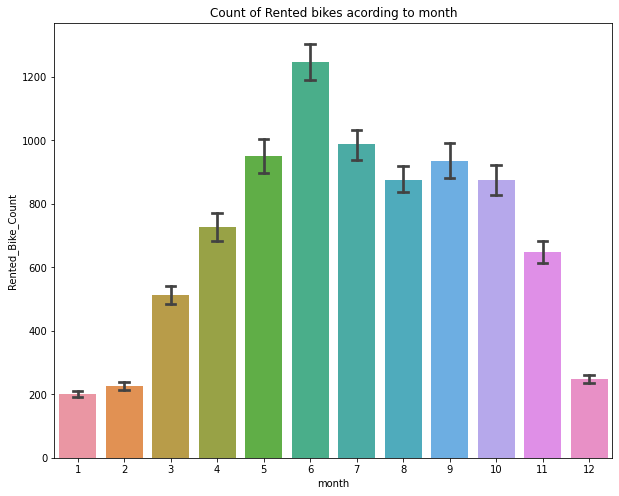

In [ ]:
#Analysis"month" data 
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=data,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to month')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month')]

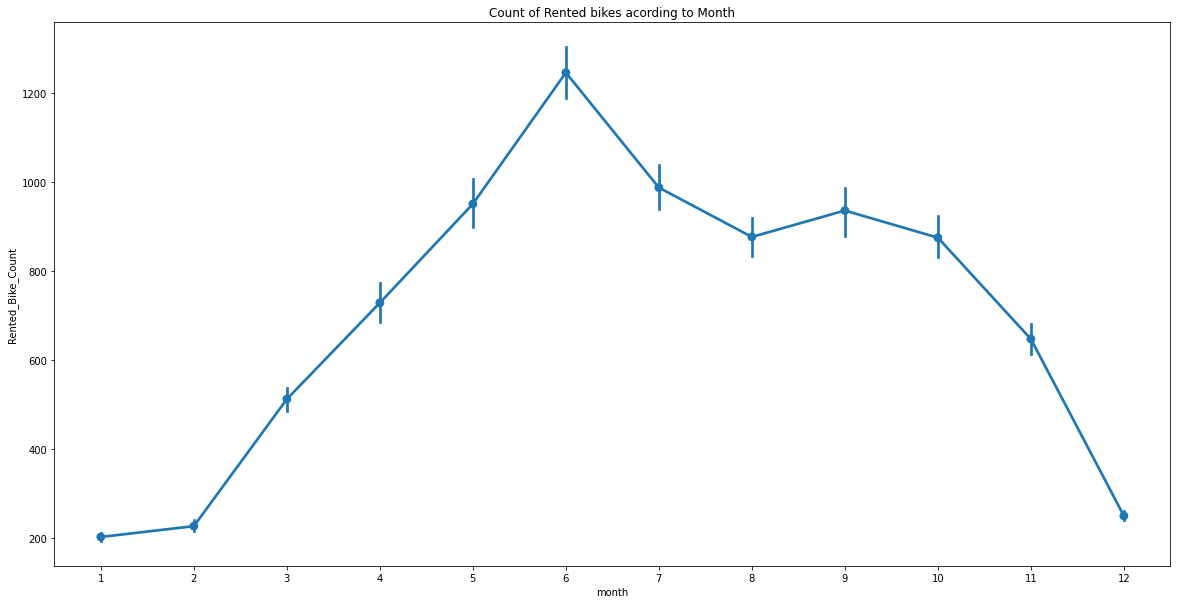

In [ ]:

#Analysis of monthwise data
fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data = data,x='month',y='Rented_Bike_Count', ax=ax)
ax.set(title = 'Count of Rented bikes acording to Month')

we can say that from the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

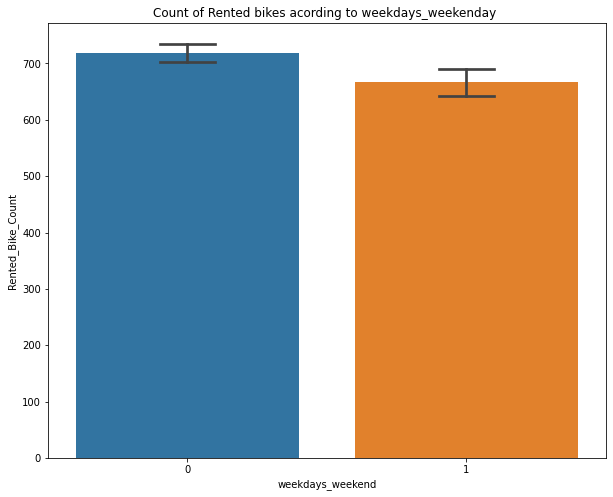

In [ ]:
#Analysis"weekdays_weekend" data 
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=data,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

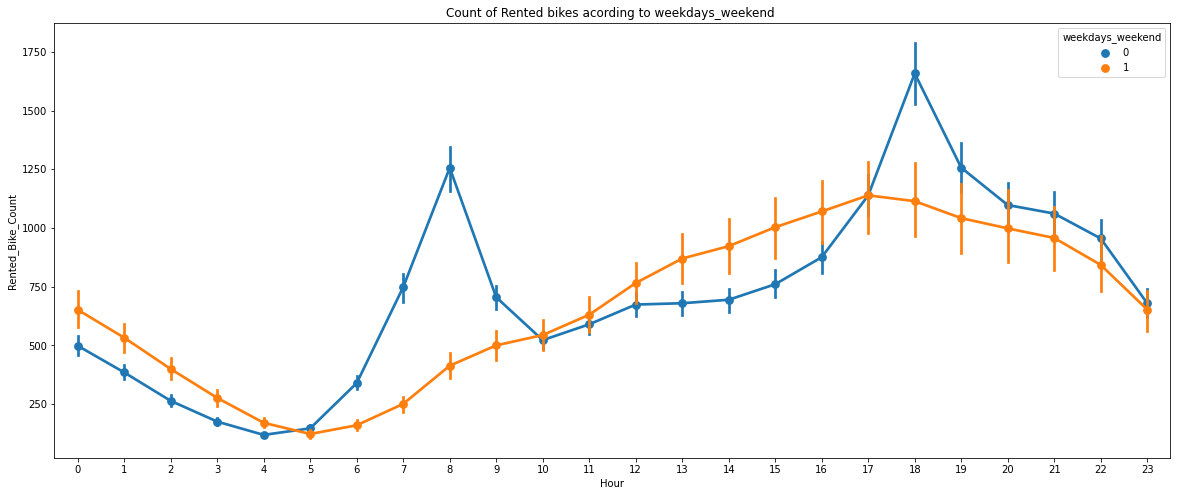

In [ ]:
#anlysis "weekdays_weekend" data
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=data,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

We figure out in the week days which represent in blue colur represent that the demand of the bike higher because of the office.

*Highest demand Time are 7 am to 9 am and 5 pm to 7 pm*

*The orange colur refers to the weekend days, and it represent that the demand of rented bikes are very low specially in the morning hour but in the evening  from 4 pm to 8 pm the demand slightly increases.*

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

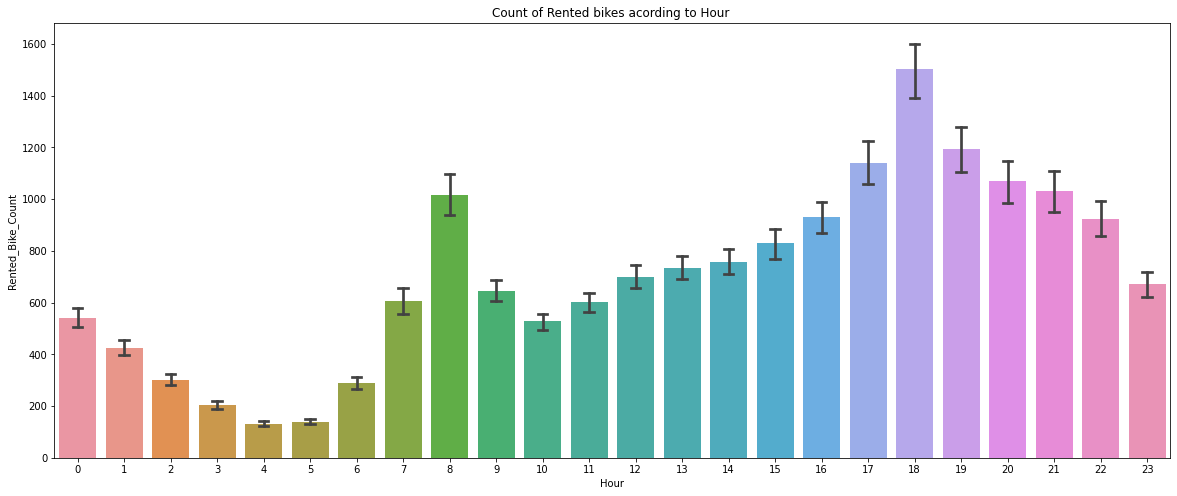

In [ ]:
#Analysis "hour" data
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=data,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to hour in different months ')]

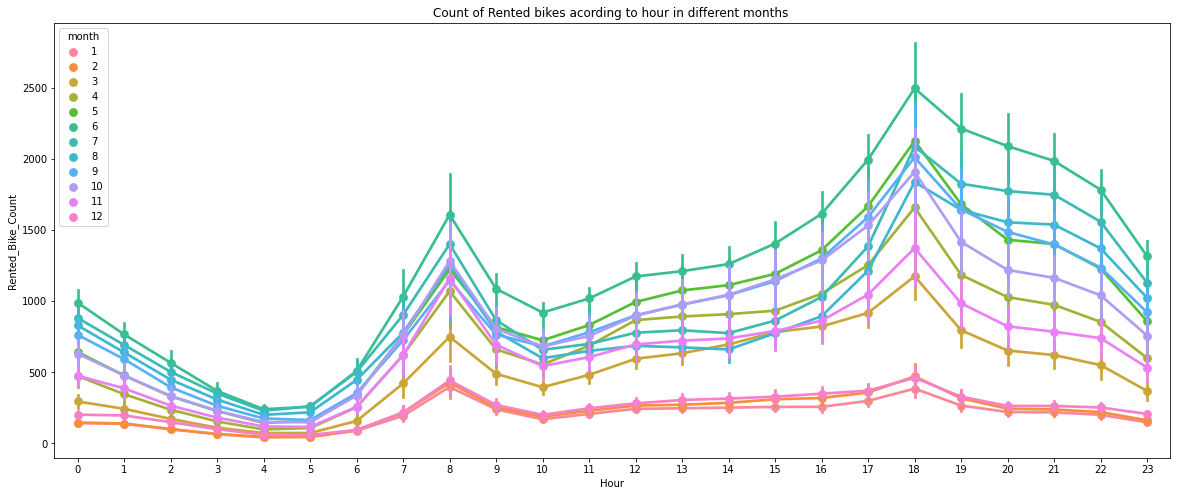

In [ ]:
#anlysis "hour" and "month" data
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=data,x='Hour',y='Rented_Bike_Count',hue='month',ax=ax)
ax.set(title='Count of Rented bikes acording to hour in different months ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

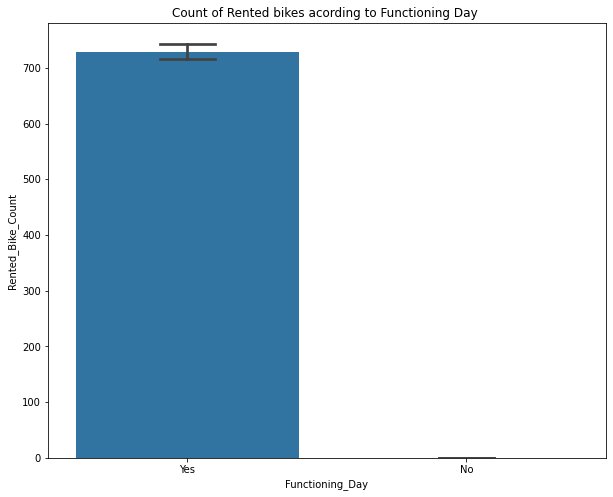

In [ ]:
#Analysis "Functioning_Day" data
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=data,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

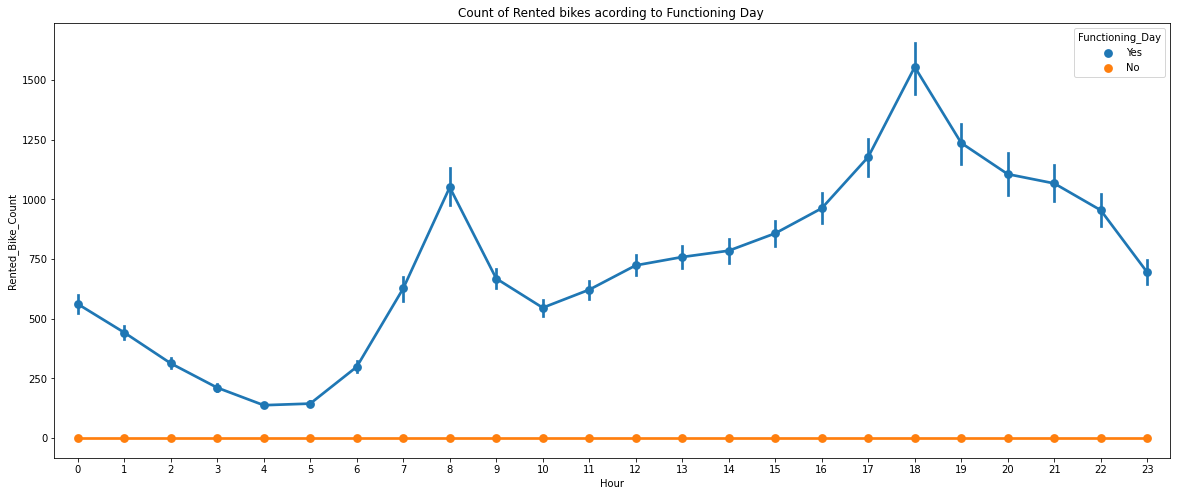

In [ ]:
#Analysis "Hour" and "Functioning_day" data
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=data,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

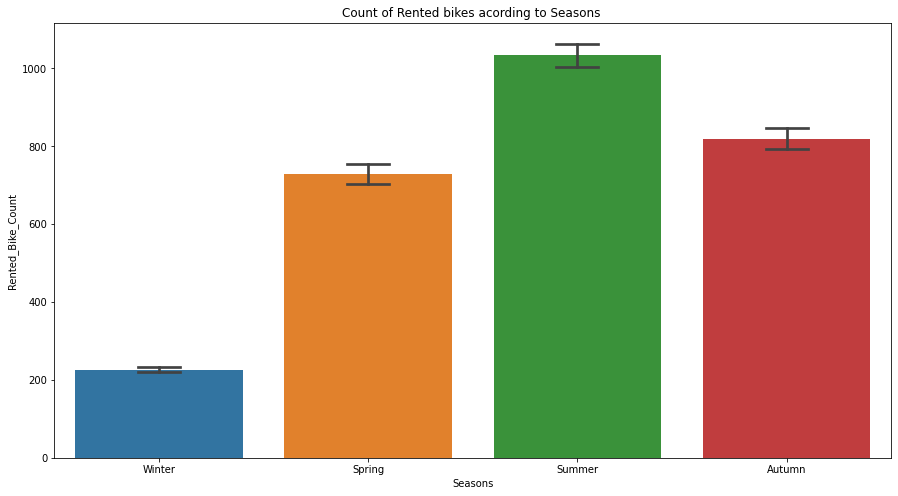

In [ ]:
#Analysis "Seasons" data
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=data,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

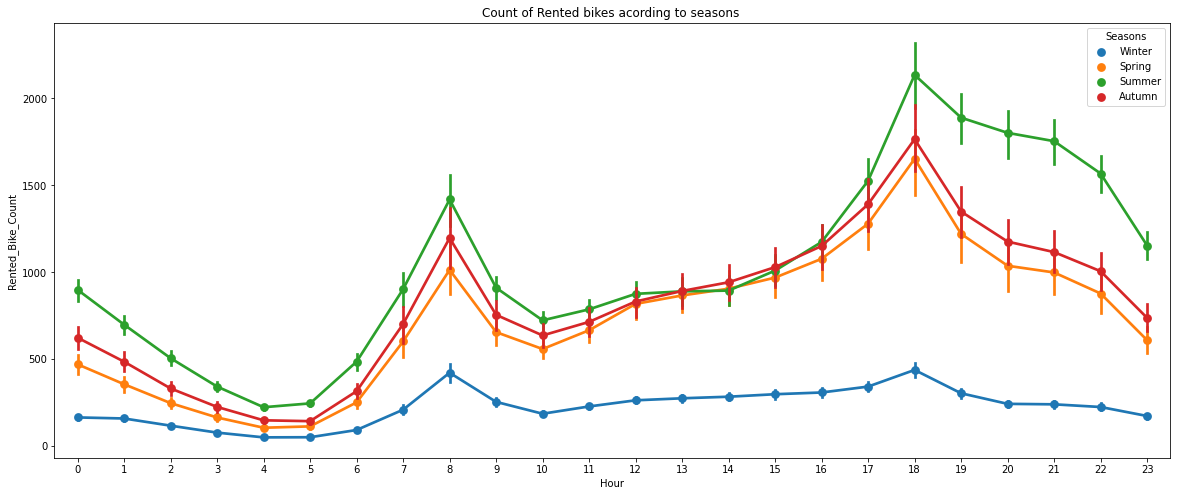

In [ ]:
#Analysis "Hour" and "Seasons" data
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=data,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

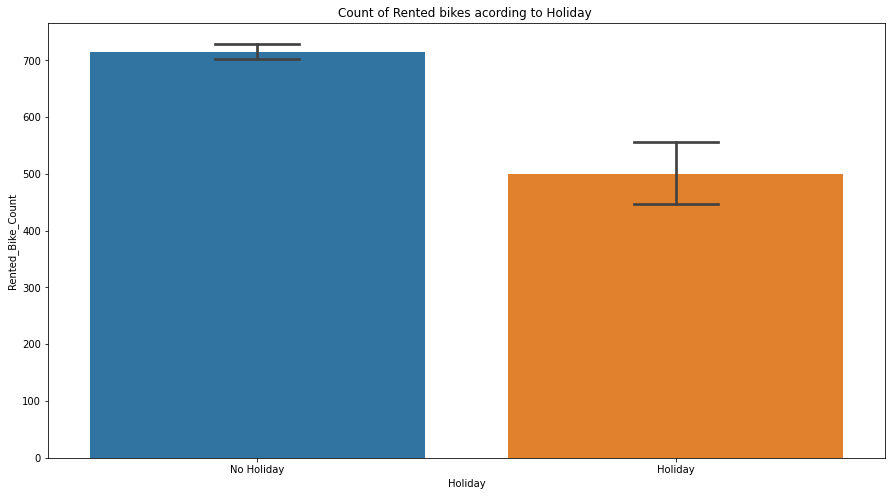

In [ ]:
#Analysis "Holiday" data
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=data,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

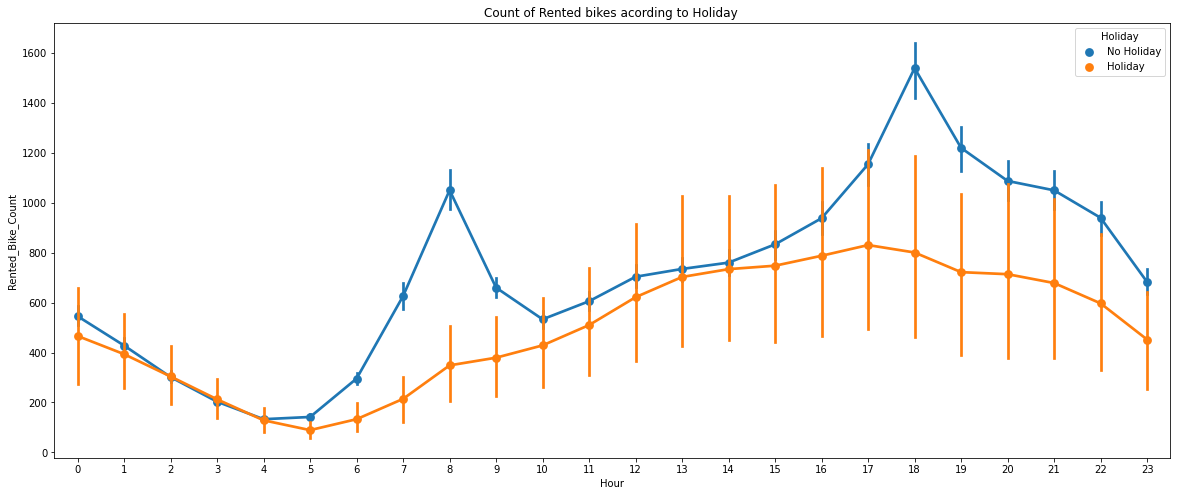

In [ ]:
#Analysis "Hour" and "Holiday" data
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=data,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

#**Analyze the numerical columns**

In [ ]:
#assign the numerical coulmn to variable
numerical_columns=list(data.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

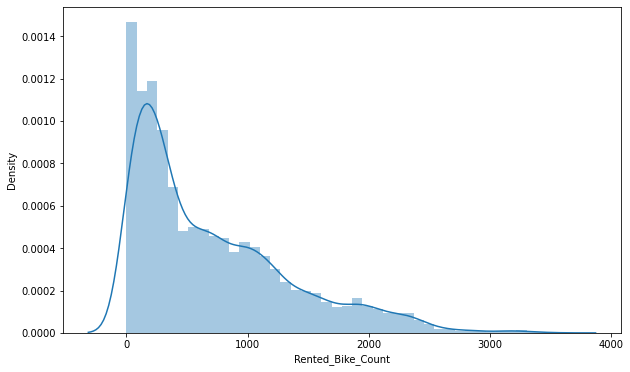

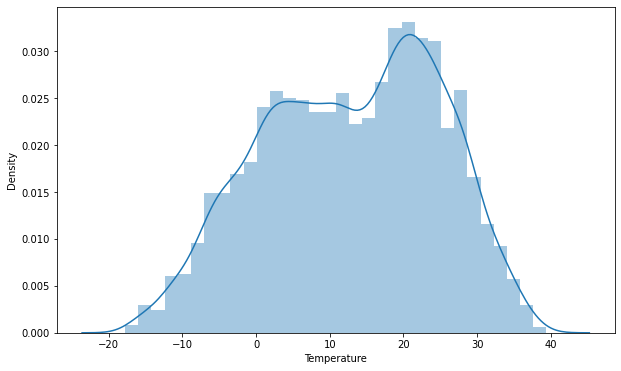

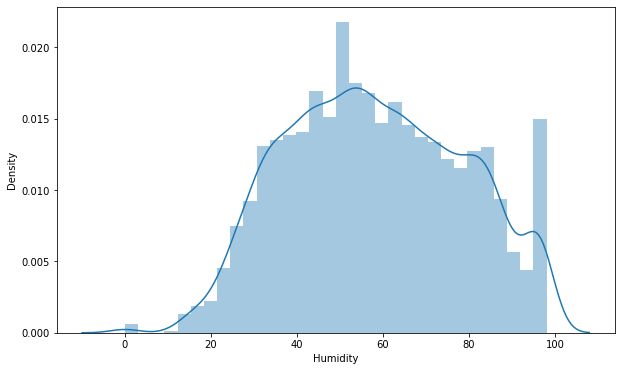

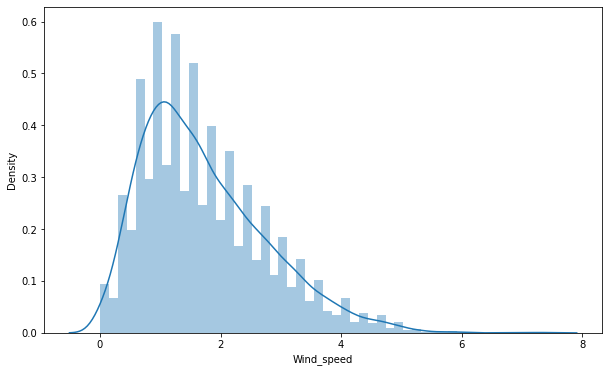

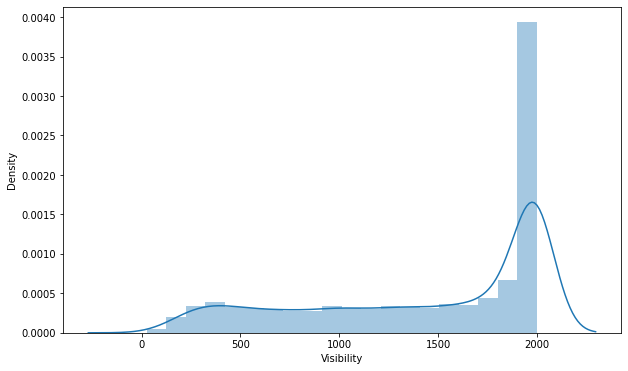

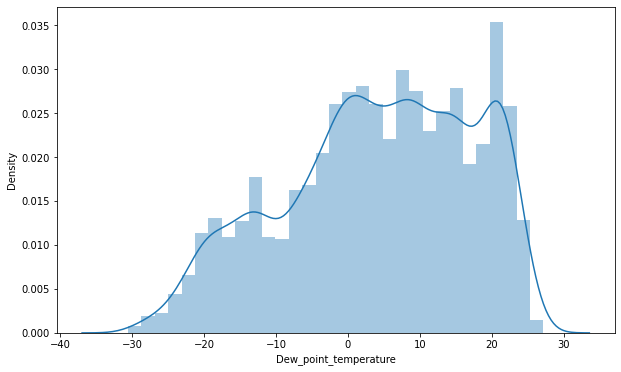

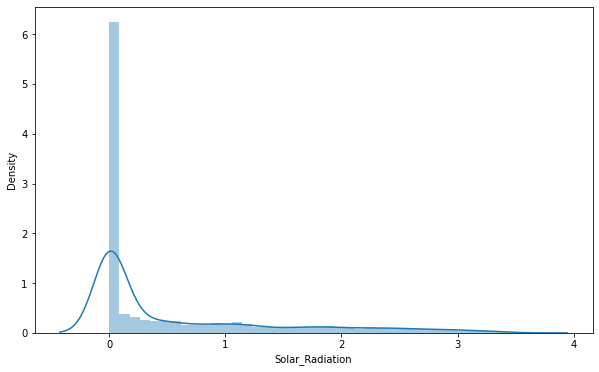

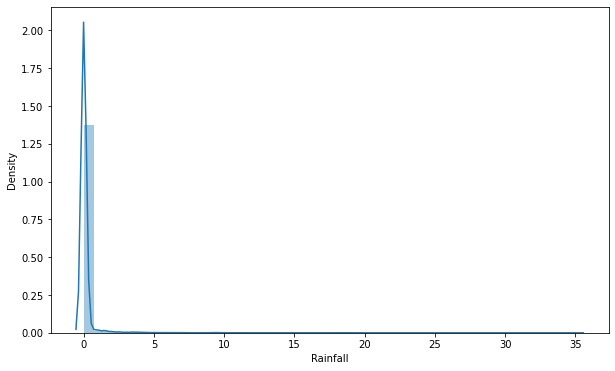

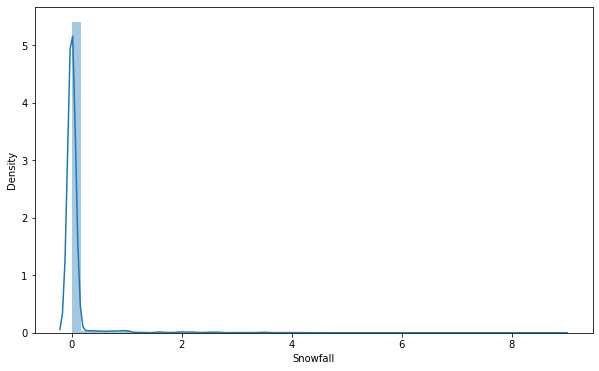

In [ ]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=data[col])
  plt.xlabel(col)
plt.show()

#**Analyze the relationship between Rented_Bike_Count and Temperature**

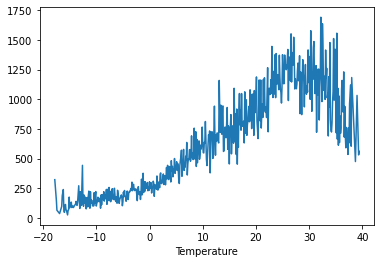

In [ ]:
#Analyze the relationship between "Rented_Bike_Count" and "Temperature" 
data.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

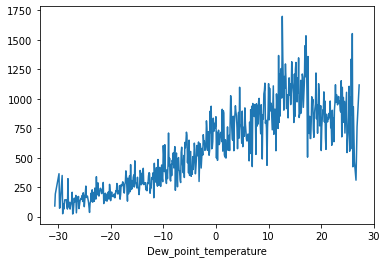

In [ ]:
#Analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature" 
data.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

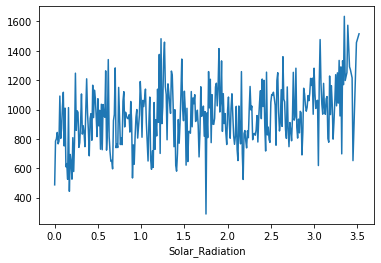

In [ ]:
#Analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation" 
data.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()



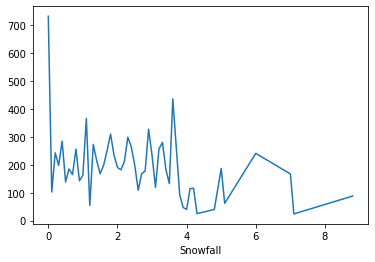

In [ ]:
#Analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
data.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()


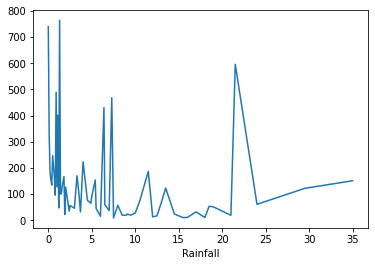

In [ ]:
#Analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
data.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()


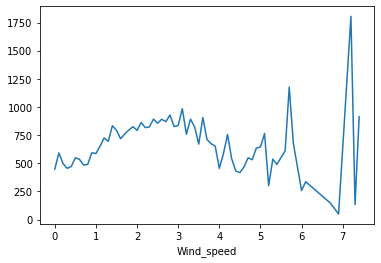

In [ ]:
#Analyze the relationship between "Rented_Bike_Count" and "Wind_speed" 
data.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

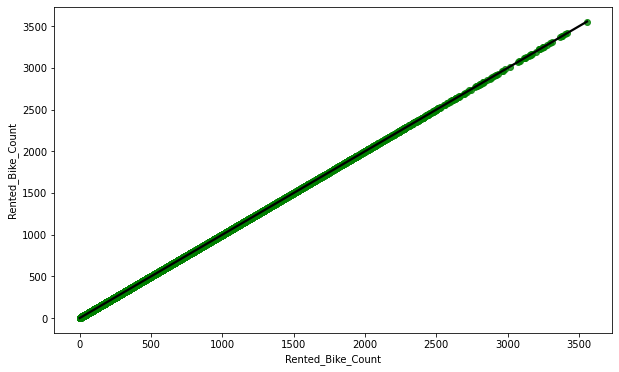

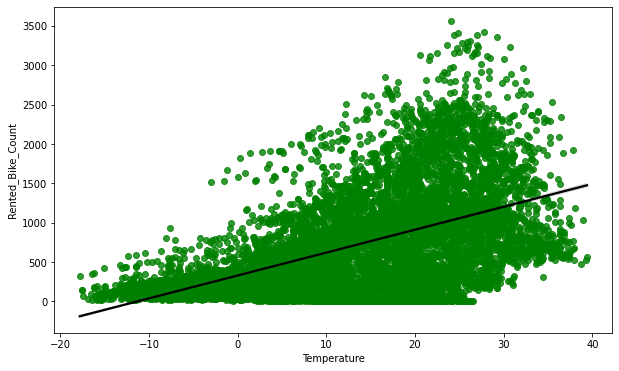

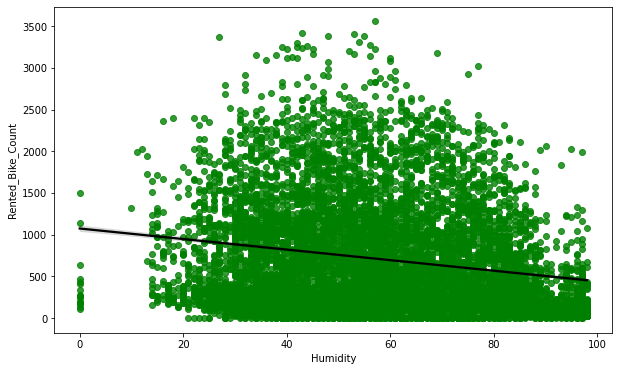

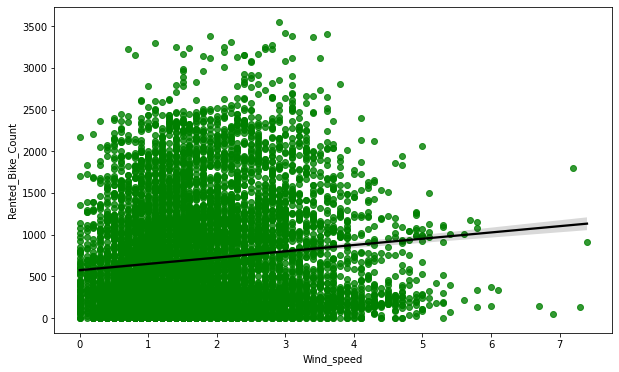

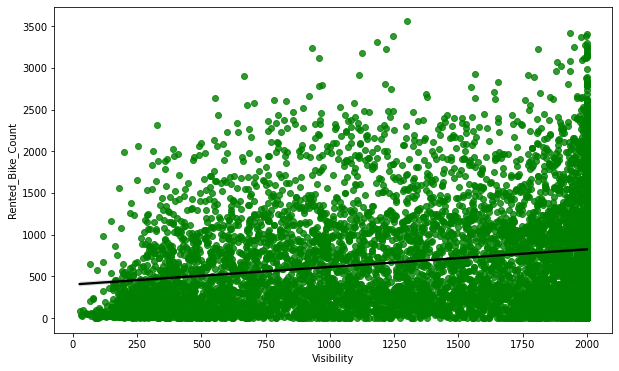

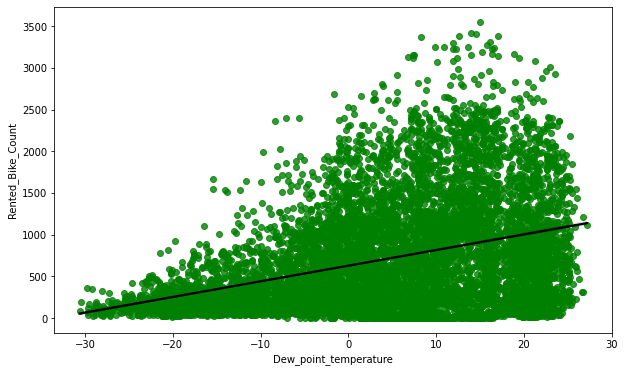

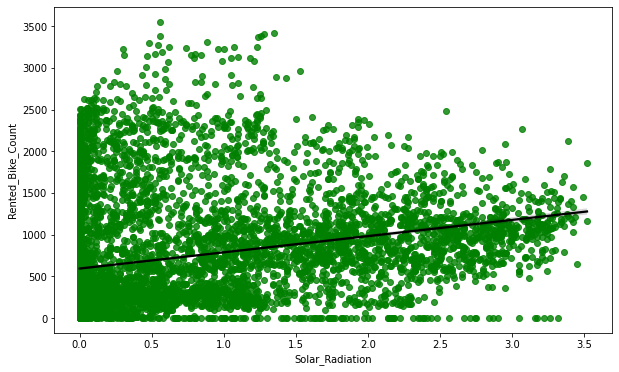

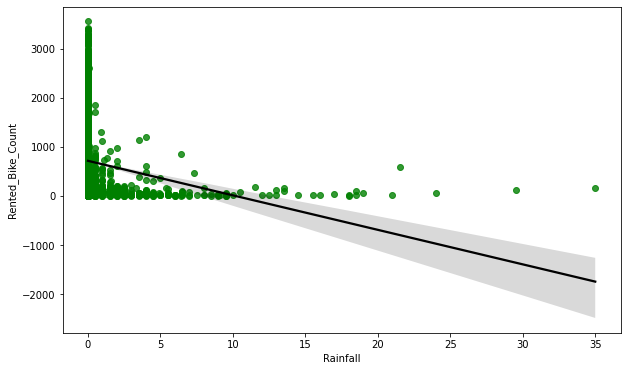

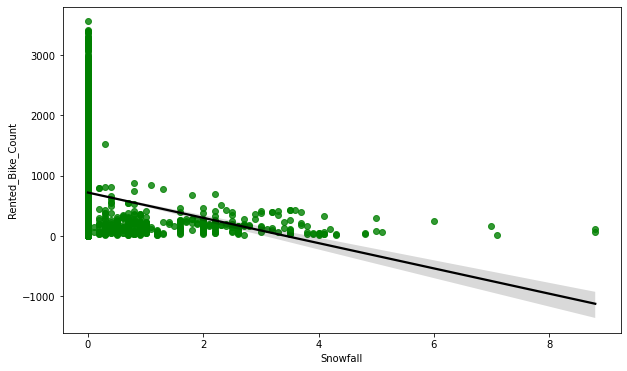

In [ ]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=data[col],y=data['Rented_Bike_Count'],scatter_kws={"color": 'green'}, line_kws={"color": "black"})

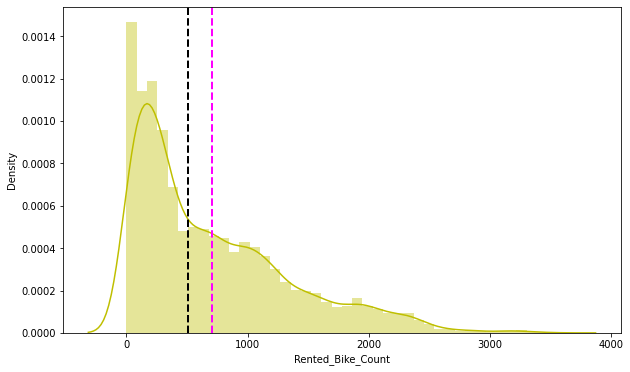

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(data['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(data['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(data['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

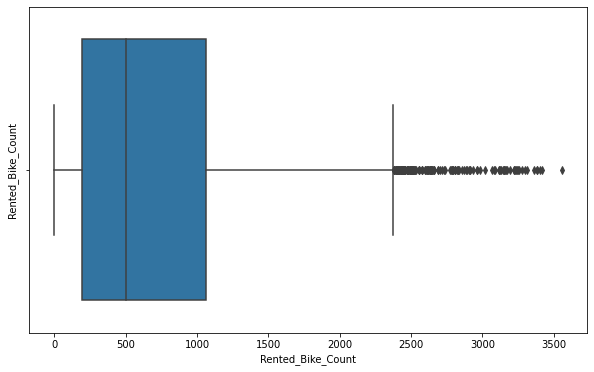

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=data['Rented_Bike_Count'])
plt.show()

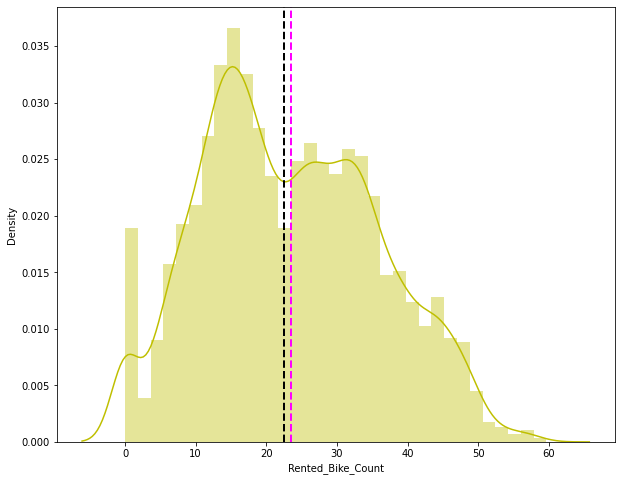

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(data['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(data['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(data['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

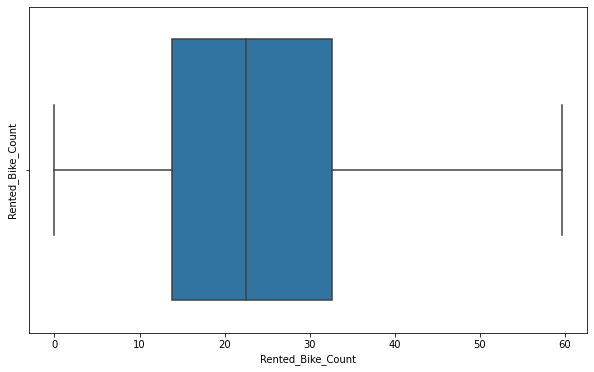

In [ ]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(data['Rented_Bike_Count']))
plt.show()

In [ ]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = data[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = data['Rented_Bike_Count']
data.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
#add a constant column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [ ]:
## fit a OLS model 

model= sm.OLS(Y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Wed, 07 Sep 2022   Prob (F-statistic):               0.00
Time:                        06:37:08   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity                -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind_speed               52.4810      5.661      9.271      0.000      41.385      63.577
Visibility               -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew_point_temperature    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar_Radiation        -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall                 41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,NaN,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,NaN,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,NaN,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,NaN,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,NaN,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,NaN,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,NaN,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


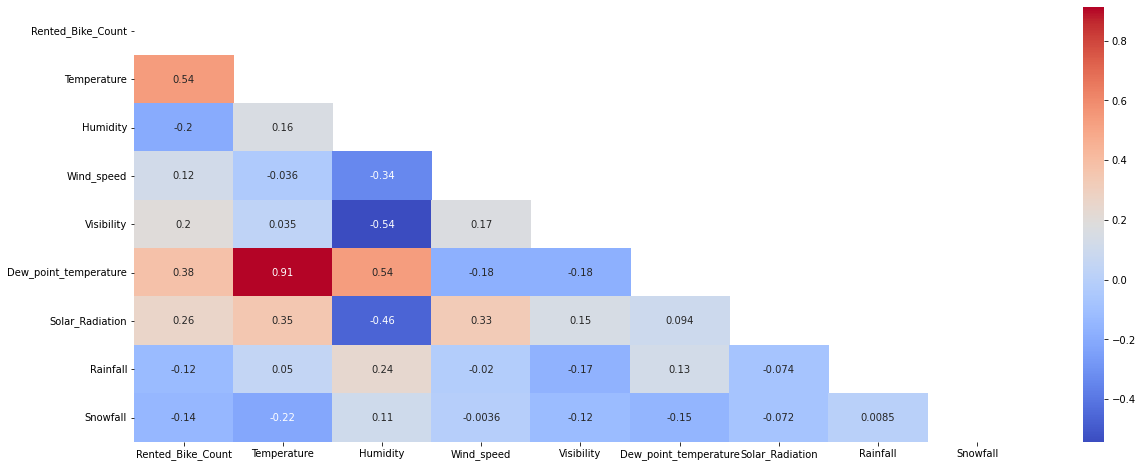

In [ ]:
## plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=data.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')

**On the heatmap, we can see that the variables with the highest positive correlations to the rent are:**

*  The temperature
*  The dew point temperature
*  The solar radiation 

**The variables with the highest negative correlation are:**

*  Humidity   
*  Rainfall 

**According to the heatmap of correlation shown above, there is a positive correlation between the columns "Temperature" and "Dew point temperature," or 0.91, so even if we remove this column, the results of our analysis won't be affected. They also vary similarly, so the column labelled "Dew point temperature(°C)" can be removed.**
   




In [ ]:
#Assign all catagoriacla features to a variable
categorical_features=list(data.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [ ]:
#One hot encoding
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    data = one_hot_encoding(data, col)
data.head() 

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Hour_1,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0


#**Let's prepare data for modelling**

In [ ]:
#Temperature and Dew point temperature are corelated with each other. We will drop dew point temperature.
data.drop('Dew_point_temperature',inplace=True,axis=1)

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):

# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
Calculate_vif(data[[i for i in data.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Temperature,11.240750
1,Humidity,3.108108
2,Wind_speed,1.427019
3,Visibility,2.315368
4,Solar_Radiation,4.636086
5,Rainfall,1.096324
6,Snowfall,1.137446
7,Hour_1,1.919400
8,Hour_2,1.922895
9,Hour_3,1.926423


In [ ]:
Calculate_vif(data[[i for i in data.describe().columns if i not in ['Rented_Bike_Count','Humidity']]])

,variables,VIF
0,Temperature,11.154944
1,Wind_speed,1.426964
2,Visibility,1.464439
3,Solar_Radiation,4.045608
4,Rainfall,1.073716
5,Snowfall,1.112211
6,Hour_1,1.919211
7,Hour_2,1.922424
8,Hour_3,1.925745
9,Hour_4,1.928353


In [ ]:
Calculate_vif(data[[i for i in data.describe().columns if i not in ['Rented_Bike_Count','Humidity','Visibility']]])

,variables,VIF
0,Temperature,9.771241
1,Wind_speed,1.418337
2,Solar_Radiation,3.816016
3,Rainfall,1.042535
4,Snowfall,1.093639
5,Hour_1,1.919033
6,Hour_2,1.921504
7,Hour_3,1.923838
8,Hour_4,1.925136
9,Hour_5,1.930306


In [ ]:
# As per above vif calculation dropping humidity and visibility columns.
data.drop(['Humidity','Visibility'],inplace=True,axis=1)

#**Import all the model libraries**

In [ ]:
#Lets import train test split for splitting the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error


In [ ]:
# Define X-variable(Independent Variables) and Y-Variable(Dependent Variable)
X=data.drop('Rented_Bike_Count',axis=1)
y=np.sqrt(data['Rented_Bike_Count'])

In [ ]:
# Split data into train test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Transforming data 
# Here if you don't apply scaling still we will get almost similar results.
# for its a good practice to apply scaling to the linear regression models.
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [ ]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6132, 45)
(6132,)
(2628, 45)
(2628,)


#**Linear Regression**

In [ ]:
# Taking instance
l_reg=LinearRegression()
# fitting the model and trainig
l_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Check coefficents
l_reg.coef_

array([ 2.18421985e+01,  9.73296009e-01,  1.08524074e+01, -6.81362391e+01,
       -1.03815777e+01, -2.59326228e+00, -5.40566833e+00, -7.97381721e+00,
       -1.03258448e+01, -1.01667662e+01, -5.33336458e+00,  9.93413267e-01,
        6.17761677e+00, -1.83840457e-01, -4.81916421e+00, -5.21121461e+00,
       -4.45318455e+00, -4.01839158e+00, -4.14947199e+00, -2.36484467e+00,
        4.66000857e-01,  4.66759039e+00,  1.13802525e+01,  8.02016446e+00,
        6.98465867e+00,  6.87513868e+00,  5.26467230e+00,  1.42669742e+00,
        4.80089954e+12,  6.81266414e+12,  9.98573611e+12,  3.39755802e+00,
        2.81854057e+01, -6.61927124e-01,  5.18483657e+12,  5.18483657e+12,
        5.18483657e+12,  3.17307197e+12,  3.17307197e+12,  3.17307197e+12,
        9.98573611e+12,  9.98573611e+12,  9.98573611e+12,  1.42136724e+00,
       -1.42031981e+00])

In [ ]:
# get dataframe for x columns and coefficient
pd.DataFrame(l_reg.coef_,X.columns, columns=['Coefficient'])

,Coefficient
Temperature,2.184220e+01
Wind_speed,9.732960e-01
Solar_Radiation,1.085241e+01
Rainfall,-6.813624e+01
Snowfall,-1.038158e+01
Hour_1,-2.593262e+00
Hour_2,-5.405668e+00
Hour_3,-7.973817e+00
Hour_4,-1.032584e+01
Hour_5,-1.016677e+01


In [ ]:
# Check intercept
l_reg.intercept_

-9985736111759.732

In [ ]:
#Checking score
l_reg.score(X_train,y_train)

0.7410406683214645

In [ ]:
# Y peredictions on train data
y_pred_train=l_reg.predict(X_train)

# y predictions on test data
y_pred=l_reg.predict(X_test)

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

#Adjusted R2
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

The Mean Absolute Error (MAE) is 4.702038874450511.
The Mean Squred Error(MSE) is 40.28177356393986.
The Root Mean Squared Error(RMSE) is 6.346792383869182.
The R2 Score is 0.7410406683214645.
Adjusted R2 : 0.7365274344231167


In [ ]:
#Saving train data set results in dataframe.
train_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
             'Adjusted R2':round(Adjusted_R2_d,2) }

In [ ]:
# create training_result dataframe
traing_results_df=pd.DataFrame(train_dict,index=[1])
traing_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Linear Regression,4.702,40.2818,6.3468,0.741,0.74


In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Adjusted R2
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

 The Mean Absolute Error (MAE) is 4.615067638078279.
 The Mean Squred Error(MSE) is 37.079711816860836.
The Root Mean Squared Error(RMSE) is 6.0893112760689805.
The R2 Score is 0.758592617752073.
Adjusted R2 : 0.7543852853736235


In [ ]:
# Store test result in dictionary.
test_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
             'Adjusted R2':round((Adjusted_R2_d),2)}

In [ ]:
# create test_result dataframe
test_results_df=pd.DataFrame(test_dict,index=[1])
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Linear Regression,4.6151,37.0797,6.0893,0.7586,0.75


In [ ]:
# define a fucntion to plot predicted y values and actual y values
def plot_Pred_vs_actual(y_pred,y_test):
  ''' Visualize predicted values with actaul values'''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [ ]:
# define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred,y_test):
  '''Plot scatter plot for y_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred,scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
 #Mean of residuals should be zero or close to 0 as much as possible. It is done to check whether our line is actually the line of “best fit” 
def Residual_distPlot(y_pred,y_test):  
  '''Checks the distribution of residals)'''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x=y_test-y_pred)

  plt.title("Residual Distribution")

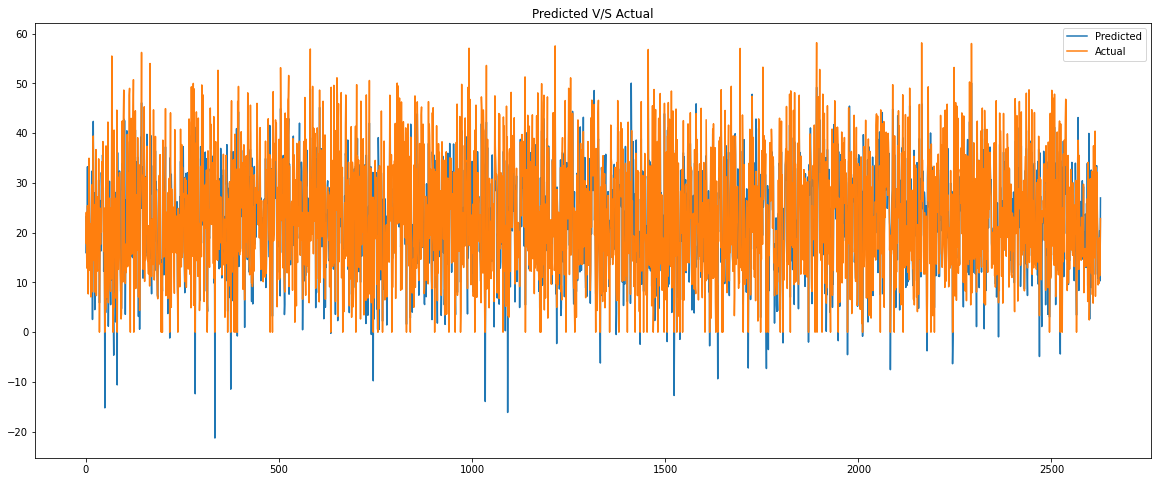

In [ ]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

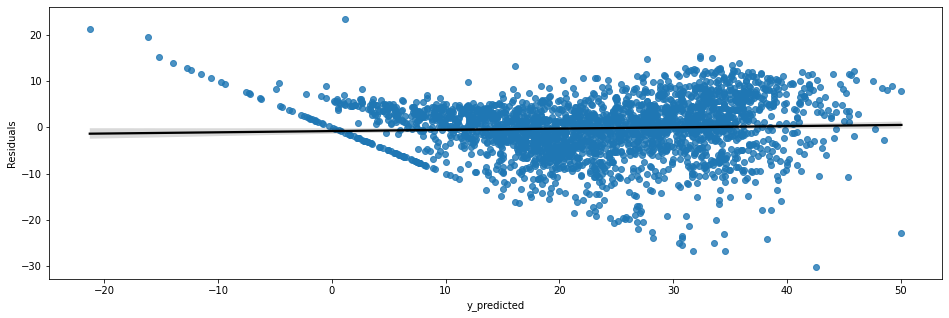

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

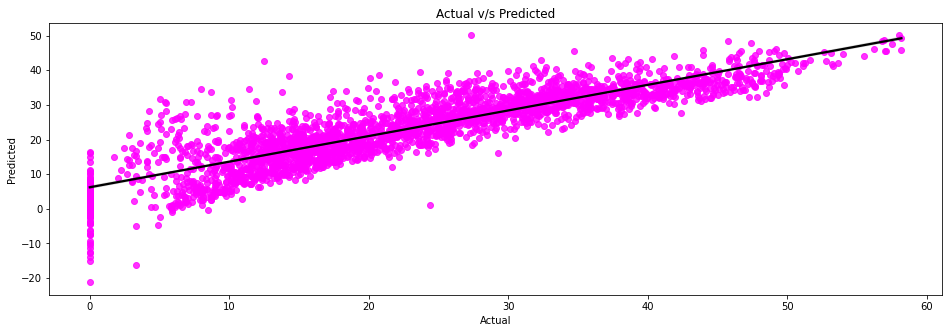

In [ ]:
# Checking how predicted values and actual values are close to the regression line
plot_scatter(y_pred,y_test)

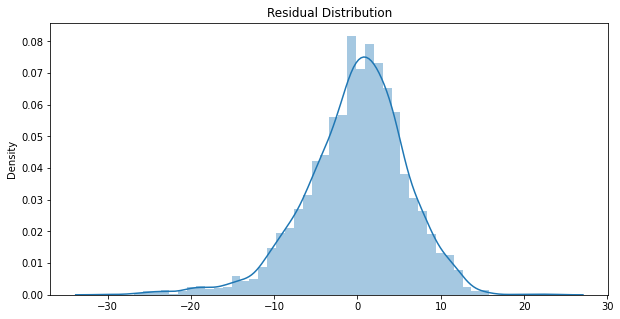

In [ ]:
Residual_distPlot(y_pred,y_test)

In [ ]:
# instantiating the Lasso
lasso_reg=Lasso(alpha=0.01)

In [ ]:
# Fitting and training the model
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.01)

In [ ]:
# Check coefficient
lasso_reg.coef_

array([ 20.77546085,   0.38466372,   9.8879617 , -59.37787174,
        -5.97021605,  -2.10799249,  -4.96952639,  -7.52822131,
        -9.88525808,  -9.69955309,  -4.91394605,   0.99943659,
         6.25134555,   0.        ,  -3.94677085,  -4.17509268,
        -3.33202907,  -2.90510946,  -2.9658108 ,  -1.25961011,
         1.0546541 ,   5.10123576,  11.62084681,   8.21588334,
         7.03901094,   6.93543945,   5.32949285,   1.43910067,
        -0.        ,  -0.        ,  -5.14530136,   3.07703565,
        27.70072139,  -0.47644997,  -3.27072753,  -1.16708154,
         0.82226306,   3.06189741,  -2.07575384,  -3.70912379,
         1.38384986,   3.11536959,   1.93334265,   1.11423019,
        -1.33078796])

In [ ]:
# get dataframe of x columns and Coeficients
pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coeficients']).reset_index().rename(columns={'index':'X'})

,X,Coeficients
0,Temperature,20.775461
1,Wind_speed,0.384664
2,Solar_Radiation,9.887962
3,Rainfall,-59.377872
4,Snowfall,-5.970216
5,Hour_1,-2.107992
6,Hour_2,-4.969526
7,Hour_3,-7.528221
8,Hour_4,-9.885258
9,Hour_5,-9.699553


In [ ]:
# Check score on train dataset
lasso_reg.score(X_train,y_train)

0.7393914181595638

In [ ]:
# Check score on test dataset
lasso_reg.score(X_test,y_test)

0.756299440468227

In [ ]:
# Check intercept
lasso_reg.intercept_

-16.93736679462945

In [ ]:
# y prdiction on train data
y_pred_train=lasso_reg.predict(X_train)
# y prdiction on test data
y_pred=lasso_reg.predict(X_test)

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

#Adjusted R2
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

The Mean Absolute Error (MAE) is 4.706302197698486.
The Mean Squred Error(MSE) is 40.53831856326989.
The Root Mean Squared Error(RMSE) is 6.366970909566801.
The R2 Score is 0.7393914181595638.
Adjusted R2 : 0.7348494405519652


In [ ]:
# Create train results dictionary
train_dict={'Model':"Lasso",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
             'Adjusted R2':round((Adjusted_R2_d),2)}

In [ ]:
# append train result to training result dataframe
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear Regression,4.7020,40.2818,6.3468,0.7410,0.74
1,Lasso,4.7063,40.5383,6.3670,0.7394,0.73


In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Adjusted R2
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

 The Mean Absolute Error (MAE) is 4.617535387661918.
 The Mean Squred Error(MSE) is 37.43193945811274.
The Root Mean Squared Error(RMSE) is 6.118164713221828.
The R2 Score is 0.756299440468227.
Adjusted R2 : 0.752052141793196


In [ ]:
# storing test results in the dictionary
test_dict={'Model':"Lasso",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
             'Adjusted R2':round((Adjusted_R2_d),2)
}
    


In [ ]:
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear Regression,4.6151,37.0797,6.0893,0.7586,0.75
1,Lasso,4.6175,37.4319,6.1182,0.7563,0.75


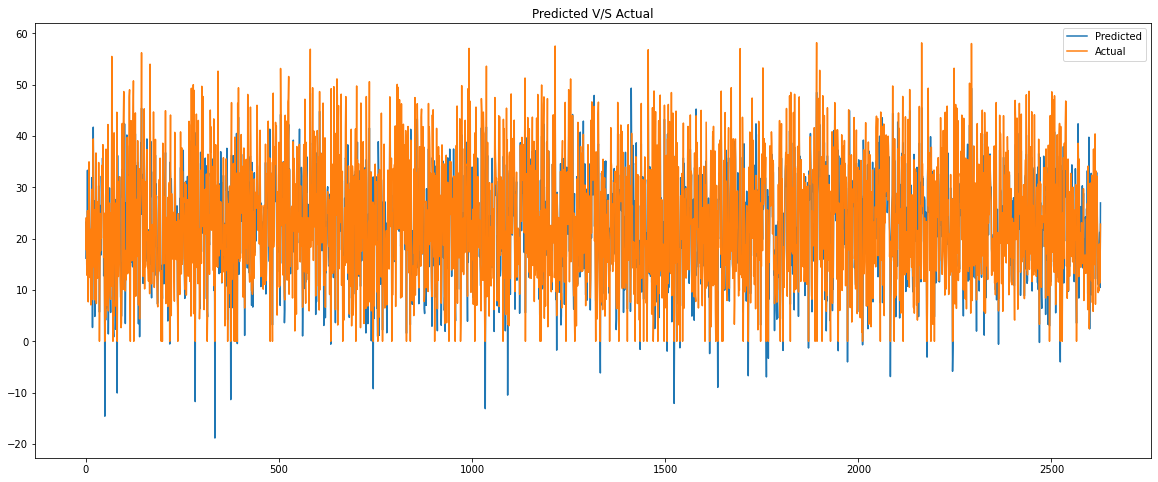

In [ ]:
#Plotting between predicted and actual values
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

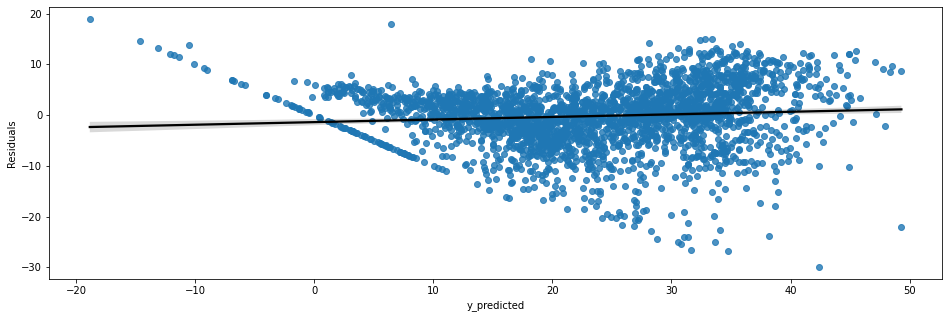

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

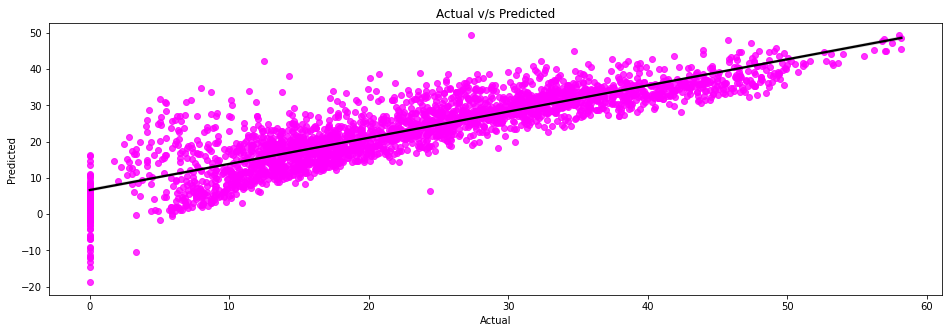

In [ ]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

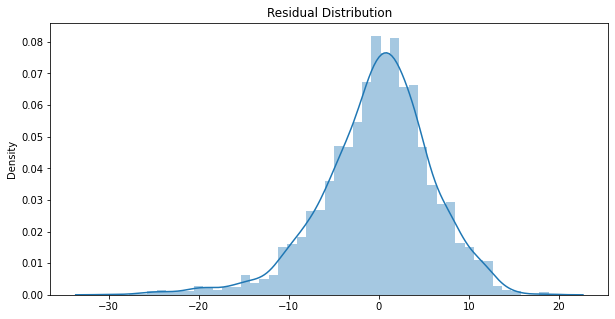

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)

Residual_distPlot(y_pred,y_test)

#**Ridge**

In [ ]:
# instantiating the Ridge 
ridge_lg=Ridge(alpha=0.1)
# fitting and training
ridge_lg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
# check coefficient of Ridge 
ridge_lg.coef_

array([ 21.79015962,   0.96391498,  10.88996293, -67.09538264,
       -10.3254096 ,  -2.58383879,  -5.40590472,  -7.96695024,
       -10.32073591, -10.15663982,  -5.33311214,   0.99583986,
         6.18423615,  -0.18587259,  -4.82228975,  -5.21738314,
        -4.46448169,  -4.02933491,  -4.15183252,  -2.37046066,
         0.47022155,   4.66875274,  11.38140958,   8.02432866,
         6.98562446,   6.87649256,   5.27305839,   1.43328141,
        -1.01152766,  -0.972888  ,  -4.85268892,   3.39589481,
        28.16638019,  -0.66365065,  -2.4131311 ,  -0.39200233,
         1.79360577,   3.83239198,  -1.58811874,  -3.21716123,
         1.34387278,   3.25078081,   2.24245098,   1.4194057 ,
        -1.41918847])

In [ ]:
# get dataframe for x columns and coeff
pd.DataFrame(ridge_lg.coef_,X.columns,columns=['Coefficients'])

,Coefficients
Temperature,21.790160
Wind_speed,0.963915
Solar_Radiation,10.889963
Rainfall,-67.095383
Snowfall,-10.325410
Hour_1,-2.583839
Hour_2,-5.405905
Hour_3,-7.966950
Hour_4,-10.320736
Hour_5,-10.156640


In [ ]:
# Check intercept
ridge_lg.intercept_

-17.962135830389446

In [ ]:
# y predictions on training dataset
y_pred_train_ridge=ridge_lg.predict(X_train)
# y predictions on test dataset
y_pred_ridge=ridge_lg.predict(X_test)

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

#Adjusted R2
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

The Mean Absolute Error (MAE) is 4.706302197698486.
The Mean Squred Error(MSE) is 40.53831856326989.
The Root Mean Squared Error(RMSE) is 6.366970909566801.
The R2 Score is 0.7393914181595638.
Adjusted R2 : 0.7348494405519652


In [ ]:
#storing the train result in the dictionary
train_dict={'Model':"Ridge GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
             'Adjusted R2':round((Adjusted_R2_d),2)}

#Append and print the train result in the matrix
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear Regression,4.7020,40.2818,6.3468,0.7410,0.74
1,Lasso,4.7063,40.5383,6.3670,0.7394,0.73
2,Ridge GridSearchCV,4.7063,40.5383,6.3670,0.7394,0.73


In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Adjusted R2
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

 The Mean Absolute Error (MAE) is 4.617535387661918.
 The Mean Squred Error(MSE) is 37.43193945811274.
The Root Mean Squared Error(RMSE) is 6.118164713221828.
The R2 Score is 0.756299440468227.
Adjusted R2 : 0.752052141793196


In [ ]:
#Storing test result in the dictonary
test_dict={'Model':"Ridge(GridsearchCv Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
             'Adjusted R2':round((Adjusted_R2_d),2)}

In [ ]:
#Append the test data into matrix
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear Regression,4.6151,37.0797,6.0893,0.7586,0.75
1,Lasso,4.6175,37.4319,6.1182,0.7563,0.75
2,Ridge(GridsearchCv Tunned),4.6175,37.4319,6.1182,0.7563,0.75


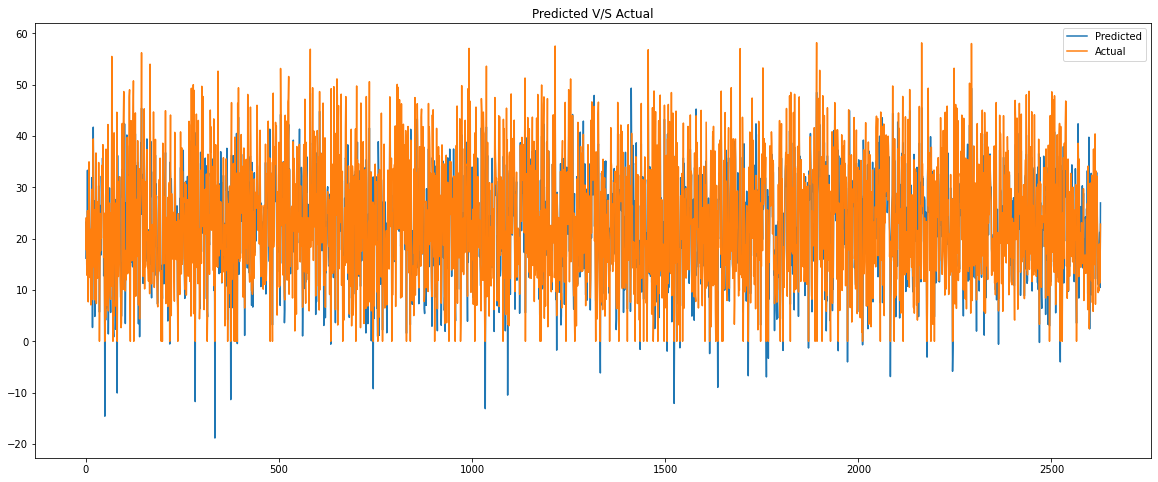

In [ ]:
#plotting between predicted and actual values
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

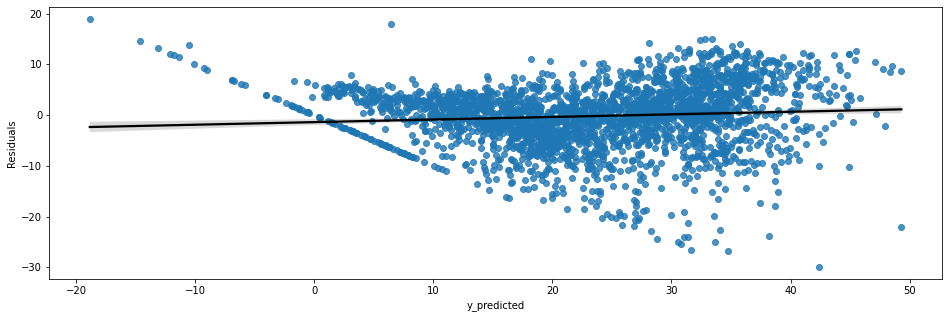

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

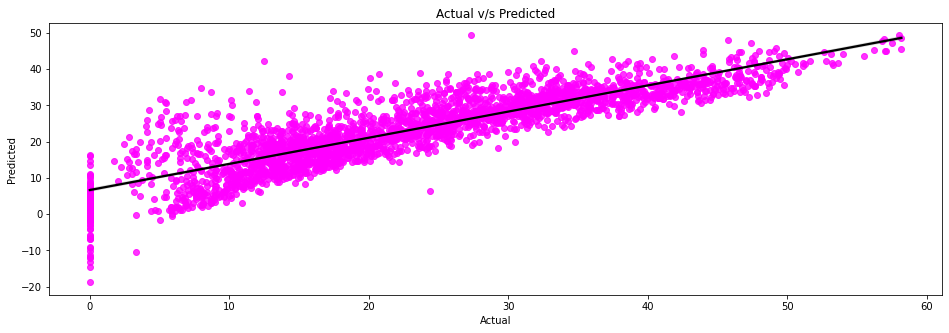

In [ ]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

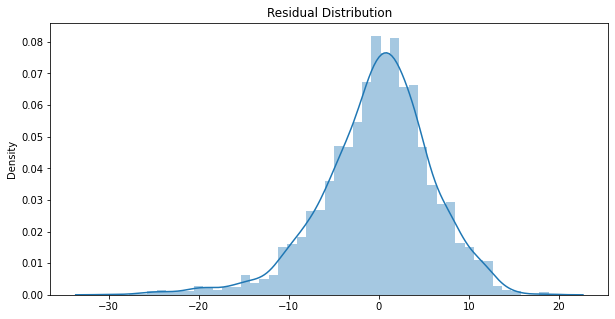

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

###As We have seen in linear regression, lasso and ridge we are getting almost similar r2 scores